In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st
import sklearn

from sklearn.preprocessing import LabelEncoder
from statsmodels.stats.outliers_influence import variance_inflation_factor
from scipy.stats import zscore
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE

from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,AdaBoostClassifier,VotingClassifier


import joblib

In [2]:
file=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset1/master/titanic_train.csv')

In [3]:
df=pd.DataFrame(file)

In [4]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
df.shape

(891, 12)

In [8]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

# EDA

## null values

In [9]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [14]:
df.dropna(inplace=True)

In [15]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

## Label Encoding

In [78]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1.000000,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,8.442944,C85,0
3,4,1,1.000000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,7.286975,C123,2
6,7,0,1.000000,"McCarthy, Mr. Timothy J",1,54.0,0,0,17463,7.201562,E46,2
10,11,1,1.732051,"Sandstrom, Miss. Marguerite Rut",0,4.0,1,1,PP 9549,4.086563,G6,2
11,12,1,1.000000,"Bonnell, Miss. Elizabeth",0,58.0,0,0,113783,5.152669,C103,2


In [80]:
df1 = df.loc[:,['Name','Ticket','Cabin']]

In [16]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [19]:
df['Cabin'].nunique()

133

In [21]:
df['Embarked'].nunique()

3

In [23]:
df['Embarked'].unique()

array(['C', 'S', 'Q'], dtype=object)

In [25]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [26]:
encoder= LabelEncoder()

In [27]:
df['Sex']=encoder.fit_transform(df['Sex'])

In [31]:
# Female = 0 , male =1

In [28]:
df['Embarked']=encoder.fit_transform(df['Embarked'])

In [82]:
df['Name']=encoder.fit_transform(df['Name'])

In [83]:
df['Ticket']=encoder.fit_transform(df['Ticket'])

In [84]:
df['Cabin']=encoder.fit_transform(df['Cabin'])

In [24]:
# 'C'= 0,'Q'= 1,'S'= 2

In [85]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass         float64
Name             int32
Sex              int32
Age            float64
SibSp            int64
Parch            int64
Ticket           int32
Fare           float64
Cabin            int32
Embarked         int32
dtype: object

In [86]:
df.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
492,493,0,1.000000,118,1,55.0,0,0,29,5.522681,56,2
539,540,1,1.000000,67,0,22.0,0,2,51,7.035624,22,0
823,824,1,1.732051,120,0,27.0,0,1,87,3.531997,106,2
309,310,1,1.000000,66,0,30.0,0,0,99,7.545144,113,0
438,439,0,1.000000,65,1,64.0,1,4,63,16.217275,55,2


### data visualization

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Survived', ylabel='count'>

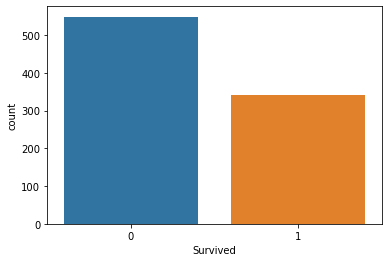

In [9]:
sns.countplot(df['Survived'])

In [11]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Ticket', ylabel='count'>

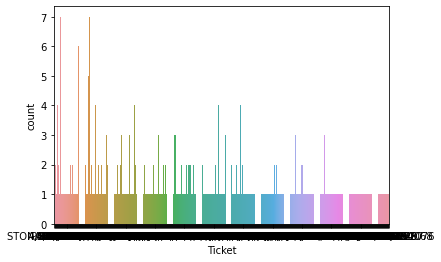

In [12]:
sns.countplot(df['Ticket'])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Embarked', ylabel='count'>

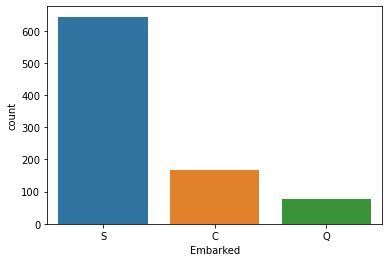

In [14]:
sns.countplot(df['Embarked'])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


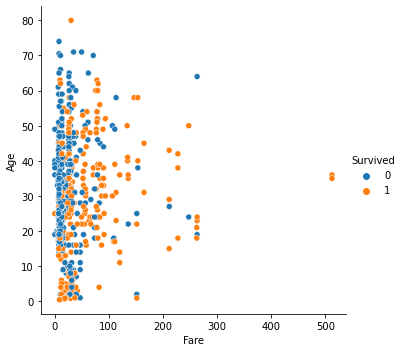

In [16]:
sns.relplot(df['Fare'],df['Age'],hue=df['Survived'])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


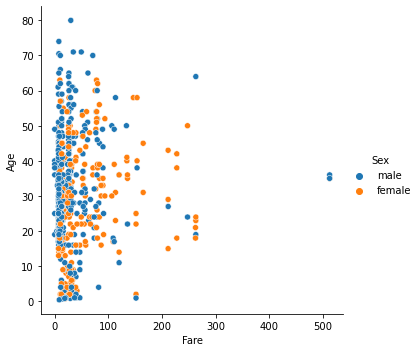

In [19]:
sns.relplot(df['Fare'],df['Age'],hue=df['Sex'])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age', ylabel='Density'>

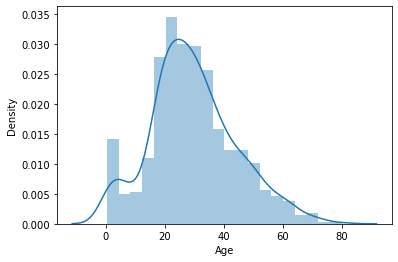

In [20]:
sns.distplot(df['Age'])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Fare'>

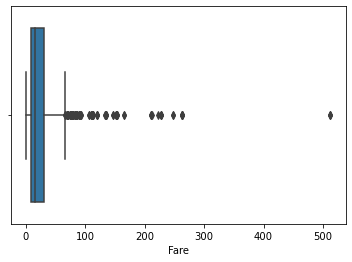

In [22]:
sns.boxplot(df['Fare'])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='SibSp'>

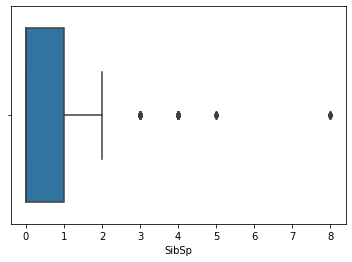

In [25]:
sns.boxplot(df['SibSp'])

In [27]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

## summary stats

In [33]:
df.describe()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
count,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000
mean,455.366120,0.672131,1.191257,0.519126,35.674426,0.464481,0.475410,78.682469,1.278689
std,247.052476,0.470725,0.515187,0.501005,15.643866,0.644159,0.754617,76.347843,0.957294
min,2.000000,0.000000,1.000000,0.000000,0.920000,0.000000,0.000000,0.000000,0.000000
25%,263.500000,0.000000,1.000000,0.000000,24.000000,0.000000,0.000000,29.700000,0.000000
50%,457.000000,1.000000,1.000000,1.000000,36.000000,0.000000,0.000000,57.000000,2.000000
75%,676.000000,1.000000,1.000000,1.000000,47.500000,1.000000,1.000000,90.000000,2.000000
max,890.000000,1.000000,3.000000,1.000000,80.000000,3.000000,4.000000,512.329200,2.000000


## Skewness

In [87]:
df.skew()

PassengerId   -0.053773
Survived      -0.739427
Pclass         2.524059
Name           0.000000
Sex           -0.077193
Age            0.009676
SibSp          1.443019
Parch          1.519305
Ticket        -0.025522
Fare           0.994590
Cabin          0.012549
Embarked      -0.585147
dtype: float64

<AxesSubplot:xlabel='Fare', ylabel='Density'>

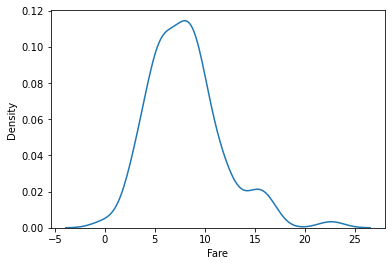

In [88]:
sns.kdeplot(df['Fare'])

<AxesSubplot:xlabel='Age', ylabel='Density'>

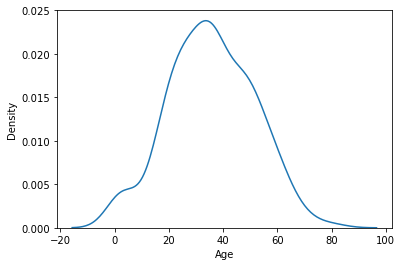

In [89]:
sns.kdeplot(df['Age'])

In [37]:
df['Pclass']=np.sqrt(df['Pclass'])

In [72]:
df['Pclass'].value_counts()

1.000000    158
1.414214     15
1.732051     10
Name: Pclass, dtype: int64

In [38]:
df['Fare']=np.sqrt(df['Fare'])

In [73]:
df['Fare'].value_counts()

5.152669     7
7.286975     5
9.486833     4
3.240370     4
3.605551     4
            ..
14.543040    1
2.837252     1
9.047558     1
5.267827     1
2.236068     1
Name: Fare, Length: 93, dtype: int64

## removing outlier 

In [40]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1.000000,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,8.442944,C85,0
3,4,1,1.000000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,7.286975,C123,2
6,7,0,1.000000,"McCarthy, Mr. Timothy J",1,54.0,0,0,17463,7.201562,E46,2
10,11,1,1.732051,"Sandstrom, Miss. Marguerite Rut",0,4.0,1,1,PP 9549,4.086563,G6,2
11,12,1,1.000000,"Bonnell, Miss. Elizabeth",0,58.0,0,0,113783,5.152669,C103,2


In [90]:
z= np.abs(zscore(df.iloc[:,[0,1,2,4,5,6,7,9,-1]]))

In [91]:
z

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
1,1.840135,0.698430,0.379990,1.039012,0.149065,0.833628,0.631730,0.100496,1.339397
3,1.832017,0.698430,0.379990,1.039012,0.043230,0.833628,0.631730,0.214152,0.755557
6,1.819841,1.431782,0.379990,0.962453,1.174636,0.723044,0.631730,0.237400,0.755557
10,1.803606,0.698430,3.381389,1.039012,2.030273,0.833628,0.697081,1.085283,0.755557
11,1.799547,0.698430,0.379990,1.039012,1.431029,0.723044,0.631730,0.795096,0.755557
...,...,...,...,...,...,...,...,...,...
871,1.691045,0.698430,0.379990,1.039012,0.725949,0.833628,0.697081,0.224372,0.755557
872,1.695104,1.431782,0.379990,0.962453,0.171426,0.723044,0.631730,1.588975,0.755557
879,1.723516,0.698430,0.379990,1.039012,1.302832,0.723044,0.697081,0.284546,1.339397
887,1.755986,0.698430,0.379990,1.039012,1.068801,0.723044,0.631730,0.706753,0.755557


In [92]:
np.where(z<3)

(array([  0,   0,   0, ..., 182, 182, 182], dtype=int64),
 array([0, 1, 2, ..., 6, 7, 8], dtype=int64))

In [94]:
newdf=df[(z<3).all(axis=1)]
newdf

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1.000000,49,0,38.0,1,0,109,8.442944,72,0
3,4,1,1.000000,70,0,35.0,1,0,31,7.286975,48,2
6,7,0,1.000000,112,1,54.0,0,0,55,7.201562,117,2
11,12,1,1.000000,27,0,58.0,0,0,26,5.152669,43,2
21,22,1,1.414214,19,1,34.0,0,0,69,3.605551,99,2
...,...,...,...,...,...,...,...,...,...,...,...,...
871,872,1,1.000000,18,0,47.0,1,1,33,7.249428,91,2
872,873,0,1.000000,35,1,33.0,0,0,89,2.236068,29,2
879,880,1,1.000000,140,0,56.0,0,1,38,9.119117,61,0
887,888,1,1.000000,75,0,19.0,0,0,10,5.477226,25,2


## correlation test

In [95]:
newdf.corr()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,1.000000,0.135926,-0.149746,-0.026542,-0.066200,-0.008382,0.030687,0.000381,-0.021255,0.007993,-0.071383,0.081779
Survived,0.135926,1.000000,0.079212,-0.141676,-0.558761,-0.284785,0.140729,0.054386,0.005723,0.167656,0.039419,-0.074869
Pclass,-0.149746,0.079212,1.000000,0.001545,-0.072266,-0.232750,-0.020685,-0.006036,0.186455,-0.394831,0.394127,0.162505
Name,-0.026542,-0.141676,0.001545,1.000000,0.028774,0.117773,-0.125422,0.030846,-0.005382,0.007834,0.094881,-0.067526
Sex,-0.066200,-0.558761,-0.072266,0.028774,1.000000,0.175466,-0.076348,-0.079220,-0.082888,-0.286941,-0.026588,0.085767
Age,-0.008382,-0.284785,-0.232750,0.117773,0.175466,1.000000,-0.154514,-0.311320,0.030839,-0.173011,-0.073393,-0.046951
SibSp,0.030687,0.140729,-0.020685,-0.125422,-0.076348,-0.154514,1.000000,0.136916,-0.008681,0.303804,0.104922,-0.011519
Parch,0.000381,0.054386,-0.006036,0.030846,-0.079220,-0.311320,0.136916,1.000000,-0.076315,0.417073,-0.048263,0.026092
Ticket,-0.021255,0.005723,0.186455,-0.005382,-0.082888,0.030839,-0.008681,-0.076315,1.000000,0.165785,0.079223,-0.284544
Fare,0.007993,0.167656,-0.394831,0.007834,-0.286941,-0.173011,0.303804,0.417073,0.165785,1.000000,-0.185564,-0.267423


<AxesSubplot:>

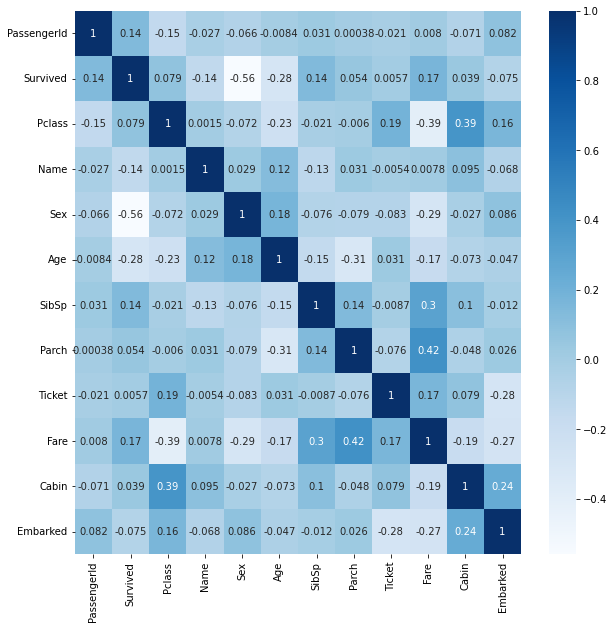

In [96]:

plt.figure(figsize=(10,10))
sns.heatmap(newdf.corr(),cmap='Blues',annot=True)

## Variance inflation test

In [97]:
newdf.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1.000000,49,0,38.0,1,0,109,8.442944,72,0
3,4,1,1.000000,70,0,35.0,1,0,31,7.286975,48,2
6,7,0,1.000000,112,1,54.0,0,0,55,7.201562,117,2
11,12,1,1.000000,27,0,58.0,0,0,26,5.152669,43,2
21,22,1,1.414214,19,1,34.0,0,0,69,3.605551,99,2


In [98]:
x=newdf.drop('Survived',axis=1)

In [99]:
y=newdf['Survived']

In [100]:
x.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1.000000,49,0,38.0,1,0,109,8.442944,72,0
3,4,1.000000,70,0,35.0,1,0,31,7.286975,48,2
6,7,1.000000,112,1,54.0,0,0,55,7.201562,117,2
11,12,1.000000,27,0,58.0,0,0,26,5.152669,43,2
21,22,1.414214,19,1,34.0,0,0,69,3.605551,99,2


In [101]:
y.head()

1     1
3     1
6     0
11    1
21    1
Name: Survived, dtype: int64

In [102]:
x

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1.000000,49,0,38.0,1,0,109,8.442944,72,0
3,4,1.000000,70,0,35.0,1,0,31,7.286975,48,2
6,7,1.000000,112,1,54.0,0,0,55,7.201562,117,2
11,12,1.000000,27,0,58.0,0,0,26,5.152669,43,2
21,22,1.414214,19,1,34.0,0,0,69,3.605551,99,2
...,...,...,...,...,...,...,...,...,...,...,...
871,872,1.000000,18,0,47.0,1,1,33,7.249428,91,2
872,873,1.000000,35,1,33.0,0,0,89,2.236068,29,2
879,880,1.000000,140,0,56.0,0,1,38,9.119117,61,0
887,888,1.000000,75,0,19.0,0,0,10,5.477226,25,2


In [103]:
def vif_calculator():
    vif=pd.DataFrame()
    vif['vif']=[variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
    vif['columns']=x.columns
    print(vif)

In [104]:
vif_calculator()

          vif      columns
0    4.407361  PassengerId
1   23.356879       Pclass
2    4.019484         Name
3    2.218434          Sex
4    7.006826          Age
5    1.892959        SibSp
6    1.868938        Parch
7    4.738943       Ticket
8    9.885041         Fare
9    5.269022        Cabin
10   3.317323     Embarked


In [105]:
df.drop('Pclass',axis=1,inplace=True)

In [106]:
df.columns

Index(['PassengerId', 'Survived', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

# Data cleansing and feature engineering

## standard scaling (normal distribution)

In [107]:
y.shape

(167,)

In [108]:
ss = StandardScaler()

In [109]:
x=ss.fit_transform(x)

In [110]:
x.shape

(167, 11)

In [111]:
df.head()

,PassengerId,Survived,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,49,0,38.0,1,0,109,8.442944,72,0
3,4,1,70,0,35.0,1,0,31,7.286975,48,2
6,7,0,112,1,54.0,0,0,55,7.201562,117,2
10,11,1,148,0,4.0,1,1,120,4.086563,131,2
11,12,1,27,0,58.0,0,0,26,5.152669,43,2


## smote (balancing data)

In [112]:
SMT = SMOTE()

In [113]:
new_x,new_y=SMT.fit_resample(x,y)

In [114]:
new_y.value_counts()

1    114
0    114
Name: Survived, dtype: int64

## Training testing

In [115]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=42)

In [5]:
knn= KNeighborsClassifier()
dtc= DecisionTreeClassifier()
svc = SVC()
RFC=RandomForestClassifier()
GBC=GradientBoostingClassifier()
ABC=AdaBoostClassifier()

In [117]:
estimators=[knn,dtc,svc,RFC,GBC,ABC]
VotingClassifier(estimators=estimators)

VotingClassifier(estimators=[KNeighborsClassifier(), DecisionTreeClassifier(),
                             SVC(), RandomForestClassifier(),
                             GradientBoostingClassifier(),
                             AdaBoostClassifier()])

In [118]:
models = [dtc,svc,knn,RFC,GBC,ABC]

In [119]:
for i in models:
    i.fit(x_train,y_train)
    models_pred=i.predict(x_test)
    print('cross_val_score of ',i,cross_val_score(i, x, y, cv=9))
    print('mean cross_val_score',i,cross_val_score(i, x, y, cv=9).mean())
    print('\n')

cross_val_score of  DecisionTreeClassifier() [0.36842105 0.73684211 0.84210526 0.84210526 0.73684211 0.66666667
 0.5        0.66666667 0.66666667]
mean cross_val_score DecisionTreeClassifier() 0.6939571150097466


cross_val_score of  SVC() [0.84210526 0.73684211 0.89473684 0.78947368 0.84210526 0.72222222
 0.55555556 0.61111111 0.66666667]
mean cross_val_score SVC() 0.7400909681611436


cross_val_score of  KNeighborsClassifier() [0.78947368 0.73684211 0.89473684 0.73684211 0.68421053 0.83333333
 0.72222222 0.66666667 0.66666667]
mean cross_val_score KNeighborsClassifier() 0.7478882391163093


cross_val_score of  RandomForestClassifier() [0.73684211 0.73684211 0.84210526 0.73684211 0.73684211 0.77777778
 0.72222222 0.66666667 0.72222222]
mean cross_val_score RandomForestClassifier() 0.7124756335282652


cross_val_score of  GradientBoostingClassifier() [0.36842105 0.73684211 0.84210526 0.68421053 0.63157895 0.66666667
 0.61111111 0.72222222 0.77777778]
mean cross_val_score GradientBoosti

## Hyperparameter tuning

In [120]:
svc_parameters= {'kernel': ['linear','rbf']}

In [121]:
gscv = GridSearchCV(svc,svc_parameters)

In [122]:
gscv.fit(x_train,y_train)

GridSearchCV(estimator=SVC(), param_grid={'kernel': ['linear', 'rbf']})

In [123]:
print('best score is:',gscv.best_score_,'\n','best estimator_s kernal:',gscv.best_estimator_.kernel,'best parameter :',gscv.best_params_)

best score is: 0.7318840579710144 
 best estimator_s kernal: linear best parameter : {'kernel': 'linear'}


In [124]:
#svc = SVC( kernel='linear')

## Prediction

In [141]:
def prediction(data1):
    data1= np.array(data1)
    data1= data1.reshape(1,-1)
    pred= knn.predict(data1)
    print(pred)
    if pred == 0:
        print('Not Survived')
    elif pred == 1:
        print('Survived')
    print("cv_score",cross_val_score(svc,x,y,cv=9).mean())

In [142]:
newdf

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1.000000,49,0,38.0,1,0,109,8.442944,72,0
3,4,1,1.000000,70,0,35.0,1,0,31,7.286975,48,2
6,7,0,1.000000,112,1,54.0,0,0,55,7.201562,117,2
11,12,1,1.000000,27,0,58.0,0,0,26,5.152669,43,2
21,22,1,1.414214,19,1,34.0,0,0,69,3.605551,99,2
...,...,...,...,...,...,...,...,...,...,...,...,...
871,872,1,1.000000,18,0,47.0,1,1,33,7.249428,91,2
872,873,0,1.000000,35,1,33.0,0,0,89,2.236068,29,2
879,880,1,1.000000,140,0,56.0,0,1,38,9.119117,61,0
887,888,1,1.000000,75,0,19.0,0,0,10,5.477226,25,2


In [145]:
data1= [2,1.0,49,0,38.0,1,0,109,8.442944,72,0]

In [146]:
prediction(data1)

[0]
Not Survived
cv_score 0.7400909681611436


## Saving Data

In [7]:
joblib.dump(knn,'titanic.obj')

['titanic.obj']